vectorize(token)![WordCloud](./img/wordcloud.png)

In [1]:
#hideInput
try:
    username
except NameError:
    username = 'Lernende(r)'

print('Hallo, ' + username + '!')

Hallo, Lernende(r)!


In [2]:
#hideInput
from taskreview.learning_module import LearningModule
lm = LearningModule('data/lernmodul_texte.db')

# Lernmodul zur Verarbeitung und Analyse von Textdaten

Das Verarbeiten menschlicher Sprache gilt als Voraussetzung für eine erfolgreiche Mensch-Maschine-Kommunikation. Zusätzlich kann sie dabei helfen eine vom Mensch unternommene Textanalyse zu unterstützen. Textanalysen, wie sie auf Social Media Plattformen, wie Facebook und Twitter, benötigt werden, gehen bspw. den folgenden Fragen nach.  Handelt es sich bei diesem Kommentar um unerwünschte Inhalte? Verbreitet dieser Beitrag Falschinformationen? Und welche Meinung will der Verfasser mit dieser Rezension zum Ausdruck bringen? All diese Fragestellungen lassen sich mithilfe computergestützter Methoden der Textverarbeitung und -analyse beantworten.

Im folgenden Lernmodul wird versucht im Zuge einer Stimmungsanalyse (Sentiment Analysis) die Intention hinter einem Textbeitrag zu identifizieren um bspw. zwischen einer negativen und einer positiven Aussage zu unterscheiden. Diese Unterscheidung übernimmt ein Modell (hier: Klassifikator), welches auf Basis von Metadaten (hier: Vokabular) eine Vorhersage (hier: Stimmung) über vorliegende Rohdaten (hier: Tweets) trifft.

Die folgende Abbildung verdeutlicht dabei den Weg eines Tweets, welcher die drei Domänen [Daten](#2.-Daten), [Modell](#3.-Modell) und [Verwendung](#4.-Verwendung) durchläuft, bis er letztendlich einer Stimmung zugeordnet wurde:

![Pipeline](./img/flow.png)

**Übersicht über die Lerninhalte:**

1. [Einführung](#1.-Einführung)
    1. [Motivation](#1.1-Motivation)
    2. [Voraussetzungen](#1.2-Voraussetzungen)
2. [Daten](#2.-Daten)
    1. [Textdaten beschaffen](#2.1-Textdaten-beschaffen)
    2. [Textdaten erkunden](#2.2-Textdaten-erkunden)
    3. [Textdaten aufbereiten](#2.3-Textdaten-aufbereiten)
        1. [Zeichen bereinigen](#2.3.1-Zeichen-bereinigen)
        2. [Wörter bereinigen](#2.3.2-Wörter-bereinigen)
        3. [Tweets bereinigen](#2.3.3-Tweets-bereinigen)
3. [Modell](#3.-Modell)
    1. [Textdaten einbetten](#3.1-Textdaten-einbetten)
        1. [Vokabular](#3.1.1-Vokabular)
        2. [Vektorisierung](#3.1.2-Vektorisierung)
        3. [Label](#3.1.3-Label)
        4. [Features](#3.1.4-Features)
    2. [Textdaten klassifizieren](#3.2-Textdaten-klassifizieren)
        1. [Überwachte Klassifikation](#3.2.1-Überwachte-Klassifikation)
        2. [Unüberwachte Klassifikation](#3.2.2-Unüberwachte-Klassifikation)
4. [Verwendung](#4.-Verwendung)
    1. [Textdaten vorhersagen](#4.1-Textdaten-vorhersagen)
        1. [Überwachter Klassifikator](#4.1.1-Überwachter-Klassifikator)
        2. [Unüberwachter Klassifikator](#4.1.2-Unüberwachter-Klassifikator)
5. [Abschluss](#5.-Abschluss)
6. [Anhang](#6.-Anhang)

**Lernziele:**

Die Teilnehmer lernen in der [Datendomäne](#2.-Daten) Textdaten in roher Form Schritt für Schritt in kontextbezogene Daten für eine Textanalyse zu transformieren. Daraufhin bewegen sich die Teilnehmer in der [Modelldomäne](#3.-Modell), in der sie die Daten in das Modell einbetten um sie von zwei unterschiedlichen Algorithmen klassifizieren zu lassen. Abschließend werden die entstandenen Klassifikatoren in der [Verwendungsdomäne](#4.-Verwendung) für eine Vorhersage der Stimmung benutzt.

**Voraussetzungen:**

- [Python](https://www.python.org/)
- [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas)

**Aufgabenüberprüfung:**

Im Verlauf dieses Lernmoduls werden verschiedene Fragen als Single- oder Multiple-Choice-Aufgabe gestellt. Der Ablauf ist dabei immer derselbe. Zuerst die Fragestellung:

    Aufgabe: Welches Thema behandelt dieses Lernmodul?
    
Daraufhin die Antwortmöglickeiten:

* Bildanalyse 

* Textanalyse

Und zuletzt eine Codezelle, welche für die Beantwortung der Frage zur Hilfe genommen werden kann:

```python
#code
solution = 'Textanalyse'
```

**Hinweis:**

Dieses Lernmodul nutzt verschiedenste Bibliotheken, Objekte und Funktionen. Diese sollten in der vorgegebenen Reihenfolge ausgeführt werden, da ansonsten kein erfolgreicher Abschluss des Lernmoduls garantiert werden kann.

Solltet ihr einmal den Überblick verlieren, gibt euch die `whos` Funktion alle aktiven Variablen und ihre Typen (bspw. Bibliothek, Klasse) aus.

In [3]:
whos

Variable         Type              Data/Info
--------------------------------------------
LearningModule   type              <class 'taskreview.learni<...>g_module.LearningModule'>
lm               LearningModule    <taskreview.learning_modu<...>ct at 0x000002B49555A438>
username         str               Lernende(r)


Erweiternd dazu führt dieses Lernmodul im [Anhang](#6.-Anhang) ein Glossar, welches englische Begriffe in ihren deutschen Kontext setzt und sie mit einem Beispiel versieht.

Zudem nutzt dieses Lernmodul eine hohe Datenmenge, welche die maximal zur Verfügung stehende Speicherkapazität überschreiten kann. Um dem vorzubeugen, können ungenutzte Variablen über die `del` Funktion verworfen und so Speicherkapazitäten freigegeben werden.

In [4]:
variable = None 
del variable

<div style="background-color: #150458; padding: 5px;"></div>

## 1. Einführung

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

### 1.1 Motivation

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von Bild- auf Textdaten, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analysis)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Dieses Lernmodul beschäftigt sich mit der ersten Problemstellung, also der Texterkennung und im besonderen mit der Unterscheidung verschiedener Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten wurden und erkannt werden müssen. Auch könnte man ein Stimmungsbild der Gesellschaft über die Auswertung von Beiträgen auf Twitter betrachten, welches in Krisenzeiten als Entscheidungshilfe für geplante Gegenmaßnahmen dienen kann.

### 1.2 Voraussetzungen

Dieses Lernmodul nimmt sich [NumPy](https://numpy.org/) für numerische Berechnungen und [Pandas](https://pandas.pydata.org/) für die Verarbeitung der Daten zur Hilfe. Letztere Bibliothek konntet ihr bereits im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennen lernen.

In [5]:
import numpy as np
import pandas as pd

Dazu werden die folgenden Skripte zum Verarbeiten, Modellieren & Visualisieren der Daten benötigt:

In [6]:
from utils import data_functions as df
from utils import model_functions as mf
from utils import vis_functions as vf

Apropos Daten - lasst uns gleich in der [Datendomäne](#2.-Daten) einsteigen.

<div style="background-color: #150458; padding: 5px;"></div>

## 2. Daten

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In diesem Kapitel beschaffen wir uns zunächst einen Datensatz, welcher aus vielen Beispielen besteht, welche die Menge an Daten bildet. Ein Beispiel umfasst dabei mindestens ein, wenn nicht sogar mehrere Merkmale. Ein Merkmal wird dabei durch einen numerischen oder symbolischen Wert verkörpert, der in unserem Fall ein Textbeitrag (Inhalt eines Tweets), aber auch ein Zeitstempel (Veröffentlichungsddatum eines Tweets) sein kann. 

Im weiteren Verlauf dieses Kapitels werden die beschafften Daten zunächst begutachtet und auf Basis ihrer Merkmale vorgefiltert. Daraufhin werden die übrig gebliebenen Daten im Abschnitt [Textdaten aufbereiten](#2.3-Textdaten-aufbereiten) verarbeitet, um sie in der darauffolgenden [Modelldomäne](#3.-Modell) zu nutzen. Die Aufbereitung eines Textbeitrags läuft dabei exemplarisch nach folgendem Prozess ab:

![Daten](./img/data_flow.png)

### 2.1 Textdaten beschaffen

Wo findet man in der heutigen Zeit aktuelle Daten, welche eine eigene Meinung enthalten? Na auf dem Kurznachrichtendienst [Twitter](https://twitter.com) natürlich! 

Unser Datensatz wird dabei ungefiltert von Twitter extrahiert und monatlich unter der [CC 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz veröffentlicht [[1]](#1).

Einen Teil dieser Veröffentlichung wollen wir zunächst als rohe JSON Daten unter der `twitter` Variable wie folgt abspeichern.

In [7]:
twitter = df.load_json()

Um die Funktionalität von Pandas nutzen zu können, wird aus jeder JSON Datei ein DataFrame, der wiederum unter der `twitter` Variable abgelegt wird.

In [8]:
twitter = map(pd.DataFrame, twitter)

Das Zusammenfügen dieser resultiert in einem einzelnen DataFrame, welcher im weiteren Verlauf als Rohdatensatz fungiert.

In [9]:
twitter = pd.concat(twitter, copy=False)

Das war's auch schon mit der Beschaffung der Daten. Als nächstes gilt es die noch unbekannten Daten zu erkunden.

### 2.2 Textdaten erkunden

Wie im [Lernmodul zum Datenimport und zur Datenvorbereitung mit Pandas](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-pandas) kennengelernt, lässt sich über die `head()` Funktion der Kopf des Datensatzes betrachten. Wie schaut dieser aus?

In [10]:
twitter.head()

,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.4b1,status,1233850617996726274,759488216,2020-02-29T20:24:45+00:00,2020-02-29T20:24:59.835143+00:00,"<a href=""http://twitter.com/download/iphone"" r...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.4b1,status,1233364221188026370,114508061,2020-02-28T12:11:59+00:00,2020-03-01T11:09:17.015566+00:00,"<a href=""http://www.sueddeutsche.de/"" rel=""nof...",51.0,145,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.4b1,status,1233850617870913541,2902622080,2020-02-29T20:24:45+00:00,2020-02-29T20:24:59.839449+00:00,"<a href=""http://www.playstation.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.4b1,status,1233701038483542016,140410244,2020-02-29T10:30:23+00:00,2020-02-29T20:24:59.842019+00:00,"<a href=""https://about.twitter.com/products/tw...",3.0,8,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.4b1,status,1233837417959952385,2335677408,2020-02-29T19:32:18+00:00,2020-03-01T11:42:05.807013+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",509.0,1773,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Leider liefert die `head()` Funktion nicht die Größe des Datensatzes zurück. Wir wollen aber schließlich wissen, mit wie vielen unterschiedlichen Tweets wir rechnen können.

**Aufgabe: Wie viele Beispiele sind im `twitter` Datensatz enthalten?**

In [11]:
#hideInput
lm.show_task(221)

Output()

Output()

Output()

In [12]:
#solution
twitter.shape[0]

450004

**Aufgabe: Wie viele Werte liegen pro Beispiel vor? Aus wie vielen Merkmalen besteht der `twitter` Datensatz?**

In [13]:
#hideInput
lm.show_task(222)

Output()

Output()

Output()

In [14]:
#solution
twitter.shape[1]

26

Als erstes kümmern wir uns um die Aktualität der Daten.

**Aufgabe: Über welches Merkmal können wir Tweets identifizieren, die nicht die gewünschte Aktualität besitzen?**

In [15]:
#hideInput
lm.show_task(223)

Output()

Output()

Output()

In [16]:
#solution
twitter.columns

Index(['twista', 'type', 'id', 'user', 'created_at', 'recorded_at', 'source',
       'retweets', 'favourites', 'lang', 'hashtags', 'urls', 'mentions',
       'mentioned_ids', 'text', 'name', 'screen_name', 'location',
       'description', 'url', 'verified', 'followers', 'friends', 'listed',
       'statuses', 'refers_to'],
      dtype='object')

Aus welchen Jahren stammen unsere Tweets?

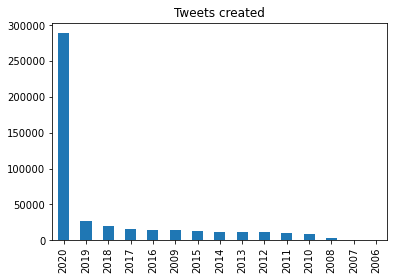

In [17]:
twitter = vf.plot_tweets_per_year(twitter)

Anscheinend enthält unser Datensatz veraltete Tweets. Da sich unsere Fragestellung auf aktuelle Inhalte bezieht, behalten wir lediglich Beispiele aus dem Jahr 2020.

In [18]:
twitter = twitter.loc[twitter['year'] == 2020]

Als Nächstes kümmern wir uns um die Sprache, die einem jeden Tweet hinterlegt ist. Welche Sprachen sind vertreten?

In [19]:
twitter['lang'].unique()

array(['de', 'en', 'pt', 'in', 'es', 'it', 'fr', 'und', 'tr', 'ca', 'da',
       'sl', 'pl', 'hi', 'nl', 'no', 'el', 'ru', 'fa', 'sv', 'et', 'cy',
       'ro', 'tl', 'ja', 'ar', 'ht', 'th', 'fi', 'ko', 'vi', 'zh', 'is',
       'hu', nan, 'cs', 'eu', 'lt', 'iw', 'ur', 'kn', 'lv'], dtype=object)

Anscheinend enthält unser Datensatz verschiedenste Sprachen. Da sich unsere Fragestellung auf deutsche Inhalte bezieht, wählen wir lediglich Beispiele mit deutscher Kennung.

In [20]:
twitter = twitter.loc[twitter['lang'] == 'de']

Nach einer ersten Filterung der Daten konzentrieren wir uns zum Abschluss auf die gewünschten Textbeiträge. Da unser Datensatz keine relevanten Metadaten enthält, extrahieren wir lediglich die Tweets vom DataFrame `twitter` in eine DataSeries `tweets` wie folgt:

In [21]:
tweets = twitter['text']
del twitter
tweets.head()

0    a) Venezuela 2019\nb) Deutschland während nCov...
1    Assad und Putin wollen Erdoğan eine Lektion er...
2    Ich hoff die Dinger kann ich a amol fahren und...
3    Trotz aussichtsloser Lage der Wehrmacht ergebe...
4    Mein Kommentar zur Causa Hopp für @derspiegel....
Name: text, dtype: object

Beim Extrahieren der Tweets werden ausnahmslos alle Beispiele berücksichtigt. Das gilt auch für fehlende Tweets, die in der Menge an Beispielen untergegangen sind oder die aufgrund eines Fehlers keinen Inhalt besitzen. Diese fehlenden Daten werden von Pandas als `NaN` (Not a Number) annotiert.

**Aufgabe: Wie viele Werte fehlen im `tweets` Datensatz?**

In [22]:
#hideInput
lm.show_task(224)

Output()

Output()

Output()

In [23]:
#solution
tweets.isna().sum()

103453

Da fehlende Werte von den folgenden Schritten nicht verarbeitet werden können, entfernen wir sie wie folgt:

In [24]:
tweets.dropna(inplace=True)

Der Übersicht halber fügen wir ein frei erfundenes Beispiel an, um die Verarbeitungsschritte des nächsten Abschnittes besser nachvollziehen zu können.

> ⚠️ Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen.
> 
> Das wurde uns von @user unter https://example.org verraten #danke

Diesen ausgedachten Tweet fügen wir wie folgt an unsere Daten an:

In [25]:
example = 'Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten! #danke 🙂'
tweets = tweets.append(pd.Series(example), ignore_index=True)

Das war's auch schon mit der Erkundung der Daten. Bis jetzt haben wir lediglich fehlende Beispiele verworfen, nicht aber vorhandene Beispiele verändert. Bevor das passiert, behalten wir lieber eine Kopie der Daten als `tweets_copy` auf die wir im Verlauf des Lernmoduls noch zurückgreifen werden.

In [26]:
tweets_copy = tweets.copy()

**Aufgabe: Wozu kann eine solche Kopie gut sein?**

In [27]:
#hideInput
lm.show_task(225)

Output()

Output()

Output()

### 2.3 Textdaten aufbereiten

Innerhalb der Datenaufbereitung werden wir jeden Tweet anhand seiner Bestandteile (bspw. Zeichen, Wörter) und Eigenschaften (bspw. Länge) verarbeiten. Exemplarische Verarbeitungsschritte wurden bereits zu [Anfang](#2.-Daten) dieses Kapitels visualisiert. Aber schauen wir uns erst einmal das eben angefügte Beispiel an.

**Aufgabe: Mit welchem Befehl kommen wir zum letzten Tweet im `tweets` Datensatz?**

In [28]:
#hideInput
lm.show_task(231)

Output()

Output()

Output()

In [29]:
#solution
tweets.iloc[-1]

'Dieser Tweet enthält viele unnütze Zeichen 😟 die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten! #danke 🙂'

Leider enthält unser ausgedachter Tweet allerhand Elemente, die wir gesondert behandeln müssen.

#### 2.3.1 Zeichen bereinigen

**Aufgabe: Welche Elemente befinden sich letzten Tweet, die wir verarbeiten müssen?**

In [30]:
#hideInput
lm.show_task(232)

Output()

Output()

Output()

Fangen wir mit den Emojis an. Diese werden über die `process_emojis()` Funktion wie folgt verarbeitet:

In [31]:
tweets = df.process_emojis(tweets)

**Aufgabe: Die `process_emojis()` Funktion kümmert sich um ausgewählte Emojis. Was passiert mit ihnen?**

In [32]:
#hideInput
lm.show_task(233)

Output()

Output()

Output()

In [33]:
#solution
tweets.iloc[-1]

'Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen. \n Das wurde uns von @user unter https://example.org verraten! #danke gut'

Nun können wir spezielle Zeichenketten, wie die URL _https://example.org_ verarbeiten. Zusätzlich werden über die `process_strings()` Funktion Sonderzeichen wie _@_ und _\n_ wie folgt behandelt:

In [34]:
tweets = df.process_strings(tweets)

**Aufgabe: Die `process_strings()` Funktion kümmert sich um spezielle Zeichenketten. Was passiert mit ihnen?**

In [35]:
#hideInput
lm.show_task(234)

Output()

Output()

Output()

In [36]:
#solution
tweets.iloc[-1]

'Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen.  Das wurde uns von  unter  verraten! #danke gut'

Als letztes kümmern wir uns um verbleibende Symbole (bspw. Satzzeichen) über die `process_symbols()` Funktion wie folgt:

In [37]:
tweets = df.process_symbols(tweets)

**Aufgabe: Die `process_symbols()` Funktion kümmert sich generell um Sonderzeichen. Was passiert mit ihnen?**

In [38]:
#hideInput
lm.show_task(235)

Output()

Output()

Output()

In [39]:
#solution
tweets.iloc[-1]

'Dieser Tweet enthält viele unnütze Zeichen schlecht die wir lieber verwerfen  Das wurde uns von  unter  verraten danke gut'

#### 2.3.2 Wörter bereinigen

Nach der Bereinigung von Zeichen im vorherigen Abschnitt bleiben lediglich ganze Wörter übrig. Jetzt können wir jeden Tweet in seine Bestandteile zerlegen. Dieser Schritt geht mit der Funktionsweise eines [Tokenizer](https://de.wikipedia.org/wiki/Tokenizer) einher, welcher lediglich den kompletten Tweet in einzelne Token, also Wörter, aufteilt. Diese lassen sich besser verarbeiten, als ein ganzer Satz.

Die Zerteilung der Zeichenkette bringt uns eine Liste von Wörtern innerhalb eines Tweets. Dabei werden alle Wörter zusätzlich in Kleinschreibung abgebildet.

In [40]:
tweets = tweets.apply(str.lower).apply(str.split)
tweets.iloc[-1]

['dieser',
 'tweet',
 'enthält',
 'viele',
 'unnütze',
 'zeichen',
 'schlecht',
 'die',
 'wir',
 'lieber',
 'verwerfen',
 'das',
 'wurde',
 'uns',
 'von',
 'unter',
 'verraten',
 'danke',
 'gut']

Jetzt besteht jeder Tweet nicht mehr nur aus einer Zeichenkette, sondern aus mehreren Wörtern. Aus Analysegründen fassen wir alle Wörter zu einer großen Sammlung unter `all_words` zusammen, was die `aggregate_words()` Funktion wie folgt umsetzt:

In [41]:
def aggregate_words(tweets):
    """Aggregate words from tweets"""
    
    all_words = []
    for sentence in tweets:
        for word in sentence:
            all_words.append(word)
            
    return all_words

In [42]:
all_words = aggregate_words(tweets)

**Aufgabe: Eine Sammlung aller Wörter findet sich in der `all_words` Liste. Wie viele unterschiedliche Wörter sind getweetet worden?**

In [43]:
#hideInput
lm.show_task(236)

Output()

Output()

Output()

In [44]:
#solution
len(pd.Series(all_words).unique())

234374

Nachdem wir alle Wörter gesammelt haben, interessieren uns die beliebtesten Wörter der Tweeter. An dieser Stelle greifen wir auf das Natural Language Toolkit ([NLTK](https://www.nltk.org/)) zurück, welches eine Häufigkeitsverteilung einer Liste über die `FreqDist()` Funktion wie folgt erstellt:

In [45]:
from nltk.probability import FreqDist
fd = FreqDist(all_words)

**Aufgabe: Die `fd` Verteilung basiert auf allen getweeteten Wörtern. Wie lauten die drei häufigsten Wörter?**

In [46]:
#hideInput
lm.show_task(237)

Output()

Output()

Output()

In [47]:
#solution
fd.most_common(3)

[('die', 62100), ('und', 53769), ('der', 45437)]

Es ist nicht überraschend, dass sich Artikel, Pronomen oder Konjunktionen als die häufigsten Wörter entpuppen. Schauen wir also etwas genauer hin und betrachten die 30 beliebtesten Wörter wie folgt:

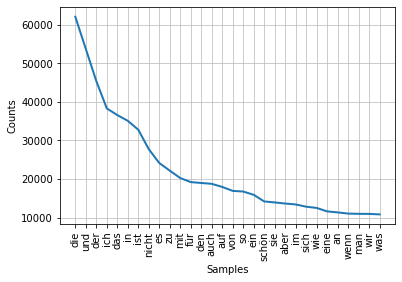

In [48]:
fd.plot(30)

Auch hier scheinen Artikel, Pronomen und Konjunktionen stark vertreten zu sein. Das bringt uns zu der Frage, welchen Inhalt bzw. welche Stimmung diese Wörter eigentlich kommunizieren?

Jene Wörter, werden im Kontext des _NLP_ als Stoppwörter bezeichnet, da sie keine Wertung implizieren, wie es ein Adjektiv (bspw. gut, schlecht) tun würde. Stoppwörter lassen sich daher ähnlich wie das Rauschen aus einer Nachricht (hier: Tweet) entfernen, ohne dass die Information (hier: Stimmung) dieser Nachricht verloren geht.

Wir werden also im folgenden Schritt alle Stoppwörter entfernen. Um sie zu identifizieren, importieren wir sie über die `load_stop_words()` Funktion in eine Liste `stop_words` wie folgt:

In [49]:
stop_words = df.load_stop_words()
stop_words.Wort.values

array(['der', 'die', 'das', 'ein', 'eine', 'einer', 'einen', 'ich', 'du',
       'er', 'sie', 'es', 'wir', 'ihr', 'sie', 'bin', 'bist', 'ist',
       'sind', 'seid', 'und', 'oder', 'doch', 'aber', 'an', 'am', 'in',
       'von', 'vor'], dtype=object)

Hätte man lediglich die meist genutzten Wörter aus der `fd` Verteilung genommen, wäre man Gefahr gelaufen, relevante Wörter (bspw. schön), ebenfalls zu entfernen.

Bevor wir alle Stoppwörter aus den Tweets entfernen, fragen wir uns aber erstmal, um wie viel Prozent wir unseres Datensatzes dadurch verkleinern würden? Dies lässt sich über die `stop_words_ratio()` Funktion wie folgt berechnen:

In [50]:
def stop_words_ratio(text):
    """Count stopwords in tweets"""
    
    stop_words_list = stop_words['Wort'].values.tolist()
    content = [word for word in text if word not in stop_words_list]
    
    return 1 - len(content) / len(text)

In [51]:
stop_words_ratio(all_words)

0.18109516308881501

Dieser Verlust klingt verkraftbar, da wir im Umkehrschluss die Datenmenge "verlustlos" verringern, was sich beschleunigend auf die weiteren Schritte auswirkt. Um die Stoppwörter endgültig aus unseren Tweets zu entfernen, werfen wir die `filter_tokens()` Funktion wie folgt an.

In [52]:
def filter_tokens(tweets):
    """Filter tokens in tweets"""
    
    row_list = []
    stop_words_list = stop_words['Wort'].values.tolist()  
    for row in tweets:
        
        token_list = []
        for token in row:
            
            if token not in stop_words_list:
                if len(token) > 1:
                    token_list.append(token)
                    
        row_list.append(token_list)
    
    return pd.Series(row_list)

In [53]:
tweets = filter_tokens(tweets)
tweets.head()

0    [venezuela, deutschland, während, ncovc, nk, i...
1    [assad, putin, wollen, erdoan, lektion, erteil...
2    [hoff, dinger, kann, amol, fahren, können, meh...
3    [trotz, aussichtsloser, lage, wehrmacht, ergeb...
4             [mein, kommentar, zur, causa, hopp, für]
dtype: object

Damit ist unsere Sammlung von Wörter nicht mehr aktuell. Der Einfachheit halber sammeln wir sie erneut über die `aggregate_words()` Funktion.

In [54]:
all_words = aggregate_words(tweets)

Nun können wir eine Aussage darüber treffen, welche Wörter mit Ausnahme der Stoppwörter am häufigsten verwendet werden? Dazu ließe sich wiederum die `FreqDist()` Funktion nutzen. 

Alternativ zur bereits bekannten Häufigkeitsverteilung lassen sich im Kontext des _NLP_ sog. Schlagwortwolken visualisieren. An dieser Stelle greifen wir auf die [WordCloud](https://amueller.github.io/word_cloud/) Bibliothek wie folgt zurück:

In [55]:
from wordcloud import WordCloud
wc = WordCloud()

Wie sehen nun die häufigsten Wörter aus?

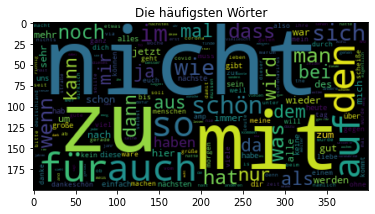

In [56]:
most_common_words = wc.generate_from_frequencies(FreqDist(all_words))
del all_words
vf.plot_image(most_common_words, 'Die häufigsten Wörter')

#### 2.3.3 Tweets bereinigen

Da uns der vergangene Abschnitt einige Wörter gekostet hat, wie die `stop_words_ration()` Funktion verriet, wollen wir nun verbliebenen Wörter pro Tweet zählen. Ein Tweet, der nur noch wenige Wörter lang ist, verkörpert keine qualitativen Daten mehr. Da Twitter kein Zeichenminimum pro Tweet setzt, kann unser Datensatz auch Tweets enthalten, die wenig bis gar keinen Inhalt repräsentieren. Um solche Tweets zu identifizieren berechnen wir die Wortlänge aller Tweets wie folgt:

In [57]:
tweets_length = [len(tweet) for tweet in tweets]

**Aufgabe: Die `tweets_length` Liste enthält die Anzahl aller Wörter eines Tweet. Wie viele Wörter besitzt der kürzeste Tweet im Datensatz?**

In [58]:
#hideInput
lm.show_task(238)

Output()

Output()

Output()

In [59]:
#solution
min(tweets_length)

0

Hoffentlich handelt es sich um einen Ausreißer. Das verifizieren wir wiederum mit einer Häufigkeitsverteilung. Dieses Mal aber als einfaches Histogramm über die `plot_tweets_per_length()` Funktion:

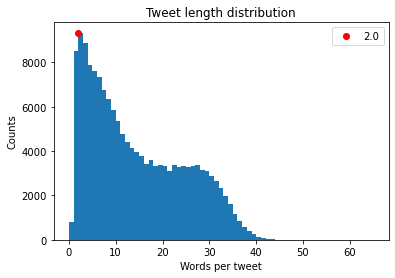

In [60]:
vf.plot_tweets_per_length(tweets_length)

Die meisten Tweets scheinen nach Entfernen der Stoppwörter nur noch wenige Wörter lang zu sein. Wir behalten lediglich Tweets, die zwei oder mehr Wörter beinhalten.

In [61]:
tweets = tweets[tweets.map(len) > 2]

Zeit für ein Status Quo: wie groß sind unsere Verluste nach Bereinigen von Zeichen, Wörtern und zu kurz geratenen Tweets?

**Aufgabe: Wie viel Prozent bleiben nach Aufbereitung der Daten im Vergleich zu den ursprünglichen Tweets übrig?**

In [62]:
#hideInput
lm.show_task(239)

Output()

Output()

Output()

In [63]:
#solution
tweets.size / tweets_copy.size

0.8811608786197849

Mit dem bereinigten Datensatz geht es nun weiter in die [Modelldomäne](#3.-Modell), in der wir uns zu aller erst um die Überführung der Daten in das Modell kümmern.

<div style="background-color: #150458; padding: 5px;"></div>

## 3. Modell

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In diesem Kapitel beschäftigen wir uns zunächst mit der Klassifikation der bereinigten Daten. NLTK ermöglicht uns die Verwendung der folgenden Klassifikationsarten:

* Überwachte Klassifikation mittels Naive Bayes
* Unüberwachte Klassifikation mittels K-means Clustering

Je nach Klassifikationsart bedarf es unterschiedlicher Schritte um die Textdaten durch ein Modell klassifizieren zu lassen. Beiden Modellen ist gemein, dass sie nicht einfach mit einer Liste von Wörtern gefüttert werden können, wie sie aus der [Datendomäne](#2.-Daten) herauskommt. Daher beschäftigt sich der erste Abschnitt dieses Kapitels mit der Überführung der Daten in ein Modell. Die folgende Abbildung verdeutlicht obligatorische Schritte, die für eine Überführung benötigt werden: 

![Model](./img/model_flow.png)

### 3.1 Textdaten einbetten

Da unsere bereinigten Daten weiterhin als Text vorliegen, benötigen wir als erstes eine Überführung der Daten in eine numerische Form, die von unserem Modell (hier: Klassifikator) verstanden wird. Man spricht in diesem Zusammenhang vom Einbetten ([Embedding](https://en.wikipedia.org/wiki/Word_embedding)) der Wörter.

Es gibt unterschiedliche Verfahren, um das symbolische Wort auf einen numerischen Wert abzubilden, deren Behandlung für dieses Lernmodul aber zu weit gingen. Daher schlagen wir die Wörter einfach in einer Art Vokabular nach, das für jedes Wort einen eigenen Wert besitzt. Wie sieht solch ein Vokabular aus?

#### 3.1.1 Vokabular 

Das Vokabular wurde über die Universität Leipzig unter der [CC BY-NC-SA 3.0 DE](https://creativecommons.org/licenses/by-nc-sa/3.0/de/) Lizenz veröffentlicht [[2]](#2) und besteht aus negativ bzw. positiv annotierten Wörtern der deutschen Sprache. Die Stimmungslage ist im Intervall von `[-1, 1]` bzw. `['negativ', 'positiv']` begrenzt. Schlagen wir negative Wörter, wie _Gefahr_ bzw. _Schuld_ im Vokabular nach, bekommen wir einen negativen Stimmungswert zurückgegeben. Je positiver das Wort, desto höher ist sein Stimmungswert. Neutrale Wörter besitzen jedoch keine Gewichtung, ihr Stimmungswert ist gleich Null.

Unser Modell interessiert sich dabei lediglich für die zwei Extrema und soll als binärer Klassifikator zwischen negativen und posiven Tweets differenzieren. Wir vergeben daher die Labels für unsere zwei Klassen wie folgt:

In [64]:
labels = ['negativ', 'positiv']

Zunächst holen wir uns die negativen Wörter für das Vokabular über die `load_vocabulary()` Funktion.

In [65]:
negative_vocabulary = df.load_vocabulary('negativ')
negative_vocabulary.head()

,Wort,Wert,Deklination,Stimmung
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen\r",negativ
1,Abdankung|NN,-0.0048,Abdankungen\r,negativ
2,Abdämpfung|NN,-0.0048,Abdämpfungen\r,negativ
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen\r",negativ
4,Abfuhr|NN,-0.3367,Abfuhren\r,negativ


Derselbe Weg führt uns zum positiven Vokabular.

In [66]:
positive_vocabulary = df.load_vocabulary('positiv')
positive_vocabulary.head()

,Wort,Wert,Deklination,Stimmung
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen\r",positiv
1,Abstimmung|NN,0.004,Abstimmungen\r,positiv
2,Agilität|NN,0.004,NaN,positiv
3,Aktivität|NN,0.004,Aktivitäten\r,positiv
4,Aktualisierung|NN,0.004,Aktualisierungen\r,positiv


Ähnlich wie beim Einlesen des `twitter` Datensatzes, führen wir das negative und das positive Vokabular im DataFrame `vocabulary` zusammen.

In [67]:
vocabulary = pd.concat([negative_vocabulary, positive_vocabulary])
del negative_vocabulary, positive_vocabulary

Wie bereits für die Tweets halten wir nach fehlenden Werten Ausschau.

**Aufgabe: In welcher Spalte des Vokabulars fehlen Werte?**

In [68]:
#hideInput
lm.show_task(311)

Output()

Output()

Output()

In [69]:
#solution
vocabulary.isna().describe()

,Wort,Wert,Deklination,Stimmung
count,3466,3466,3466,3466
unique,1,1,2,1
top,False,False,False,False
freq,3466,3466,2659,3466


Anstatt sie zu streichen, werden fehlende Werte mit einer leeren Zeichenkette ersetzt. Dies verhindert, dass unser Vokabular schrumpft, was wir unbedingt verhindern wollen, da unser Modell auf ein vollständiges Vokabular angewiesen ist.

In [70]:
vocabulary.fillna('', inplace=True)

Nun kümmern wir uns um ein paar Verschönerungen mithilfe der `format_vocabulary()` Funktion. Dabei werden insbesondere alle Deklinationsformen in eine eigene Reihe überführt und mit ihrem zugehörigen Stammwort versehen.

In [71]:
vocabulary = df.format_vocabulary(vocabulary)
vocabulary.head()

,Stamm,Wert,Stimmung,Typ,Wort
0,Abbruch,-0.0048,negativ,NN,Abbruch
1,Abbruch,-0.0048,negativ,NN,Abbruches
2,Abbruch,-0.0048,negativ,NN,Abbrüche
3,Abbruch,-0.0048,negativ,NN,Abbruchs
4,Abbruch,-0.0048,negativ,NN,Abbrüchen


Das fertige Vokabular wollen wir nun genauer betrachten.

**Aufgabe: Welche Wort-Typen sind im Vokabular vorhanden?**

In [72]:
#hideInput
lm.show_task(312)

Output()

Output()

Output()

In [73]:
#solution
vocabulary['Typ'].unique()

array(['NN', 'VVINF', 'ADJX', 'ADV'], dtype=object)

Ein Wort im Vokabular verkörpert entweder eine Stamm-, oder eine Deklinationsform. Letztere dienen der Verallgemeinerung des Vokabulars, da Stammformen im Text seltener vorkommen, als ihre zugehörigen Deklinationsformen.

**Aufgabe: Wie viele Deklinationsformen sind im Vokabular vorhanden?**

In [74]:
#hideInput
lm.show_task(313)

Output()

Output()

Output()

In [75]:
#solution
vocabulary.shape[0] - len(vocabulary['Stamm'].unique())

28621

**Aufgabe: Fällt das Vokabular eher negativ oder eher positiv aus?**

In [76]:
#hideInput
lm.show_task(314)

Output()

Output()

Output()

In [77]:
#solution
vocabulary.mean()

Wert   -0.045512
dtype: float64

**Aufgabe: Welchen Stimmungswert besitzt das Adjektiv _gut_ im Vokabular?**

In [78]:
#hideInput
lm.show_task(315)

Output()

Output()

Output()

In [79]:
#solution
vocabulary.loc[(vocabulary['Typ'] == 'ADJX') & (vocabulary['Wort'] == 'gut')]

,Stamm,Wert,Stimmung,Typ,Wort
13862,gut,0.3716,positiv,ADJX,gut


**Aufgabe: Wie lautet das "schlechteste", also das am schlechtesten annotierte Wort im  Vokabular?**

In [80]:
#hideInput
lm.show_task(316)

Output()

Output()

Output()

In [81]:
#solution
vocabulary.sort_values('Wert').head()

,Stamm,Wert,Stimmung,Typ,Wort
1096,Gefahr,-1.0000,negativ,NN,Gefahr
1097,Gefahr,-1.0000,negativ,NN,Gefahren
2219,Schuld,-0.9686,negativ,NN,Schulden
2218,Schuld,-0.9686,negativ,NN,Schuld
26481,unnötig,-0.9463,negativ,ADJX,unnötiger


Zum Abschluss visualisieren wir exemplarisch alle negativen Nomen mithilfe der bereits bekannten Schlagwortwolke.

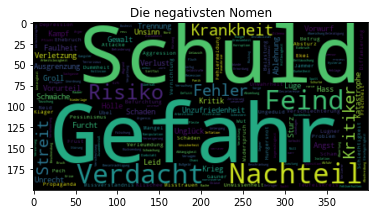

In [82]:
most_negative_nouns = wc.generate_from_frequencies(df.filter_vocabulary(vocabulary, sentiment='negativ', word='NN'))
vf.plot_image(most_negative_nouns, 'Die negativsten Nomen')

Bevor wir uns wieder unseren Tweets widmen, schauen wir noch auf die positiven Adjektive.

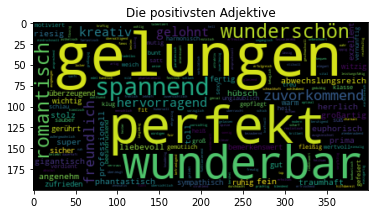

In [83]:
most_positive_adjectives = wc.generate_from_frequencies(df.filter_vocabulary(vocabulary, sentiment='positiv', word='ADJX'))
vf.plot_image(most_positive_adjectives, 'Die positivsten Adjektive')

#### 3.1.2 Vektorisierung

Das Einbetten von Wörtern geschieht innerhalb des _NLP_ über Häufigkeitsverteilungen. Je öfter ein Wort im Text vorkommt, desto wichtiger scheint es zu sein, was sich in der Vektorisierung des Wortes widerspiegelt. In unserem Fall benutzen wir anstelle der Häufigkeitsverteilung das angefertigte Vokabular in der Annahme, dass je höher ein Stimmungswert ausfällt, desto wichtiger das zugehörige Wort zu sein scheint.

Daher überführen wir jedes einzelne Wort eines Tweets in seinen Stimmungswert. Das Wort _gut_ kriegt dabei den Stimmungswert _0.37_ zugewiesen, wie bereits im vorherigen Abschnitt gezeigt wurde.

In [84]:
vocabulary.loc[vocabulary['Wort'] == 'gut'].Wert

13862    0.3716
Name: Wert, dtype: float64

Für eine performante Vektorisierung benötigen wir einen Look-up-table (LUT), welcher aus Schlüsselwertpaaren der Form `( Wort: Stimmungswert )` besteht und wie folgt erzeugt wird:

In [85]:
lut = dict((k.lower(), v) for k, v in vocabulary[['Wort', 'Wert']].values)
list(lut.items())[:3]

[('abbruch', -0.0048), ('abbruches', -0.0048), ('abbrüche', -0.0048)]

Die Vektorisierung wird nun über die `vectorize()` Funktion ermöglicht.

In [86]:
def vectorize(tweet):
    """Vectorize tweets based on look-up-table"""
    
    return [lut.get(word) for word in tweet if lut.get(word)]

Da wir die ursprünglichen Textdaten behalten wollen, brauchen wir eine zusätzliche Spalte und damit einen DataFrame statt einer DataSeries.

In [87]:
tweets = tweets.to_frame(name='Token')
tweets.head()

,Token
0,"[venezuela, deutschland, während, ncovc, nk, i..."
1,"[assad, putin, wollen, erdoan, lektion, erteil..."
2,"[hoff, dinger, kann, amol, fahren, können, meh..."
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb..."
4,"[mein, kommentar, zur, causa, hopp, für]"


Zum Abschluss vektorisieren wir mithilfe der `vectorize()` Funktion unsere Textdaten wie folgt:

In [88]:
tweets['Vector'] = tweets['Token'].apply(vectorize)
tweets.head()

,Token,Vector
0,"[venezuela, deutschland, während, ncovc, nk, i...",[]
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]"
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318]
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]"
4,"[mein, kommentar, zur, causa, hopp, für]",[]


#### 3.1.3 Label

Während unsere Tweets lediglich als einzelne Wörter bzw. Vektoren vorliegen, benötigt ein überwachter Klassifikator zusätzlich eine Klasse (hier: Label), die einem Tweet zugeordnet ist. Wie bereits bekannt wollen wir eine binäre Klassifikation durchführen, wonach es zwei unterschiedliche Klassen zuzuordnen gilt. 

Erinnern wir uns zurück an die Stimmungslage im Intervall `['negativ', 'positiv']` annotiert die `label()` Funktion im folgenden jeden Tweet auf Basis seiner summierten Stimmungswerte:

In [89]:
def label(tweet):
    """Label tweets according to sentiment score."""
    
    score = sum(tweet)
            
    if score > 0.0:
        return 'positiv'
    elif score < 0.0:
        return 'negativ'
    else:
        return 'neutral'

In [90]:
tweets['Label'] = tweets['Vector'].apply(label)
tweets.head()

,Token,Vector,Label
0,"[venezuela, deutschland, während, ncovc, nk, i...",[],neutral
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]",negativ
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318],positiv
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]",negativ
4,"[mein, kommentar, zur, causa, hopp, für]",[],neutral


**Aufgabe: Wann bekommt ein Tweet durch die `label()` Funktion eine neutrale Stimmung zugewiesen?**

In [91]:
#hideInput
lm.show_task(317)

Output()

Output()

Output()

Neutrale Tweets sind für unsere binäre Klassifikation nicht relevant, da sie eine dritte Klasse verkörpern. Sie werden somit verworfen.

In [92]:
tweets = tweets[tweets['Label'] != 'neutral']
tweets.head()

,Token,Vector,Label
1,"[assad, putin, wollen, erdoan, lektion, erteil...","[-0.0048, -0.0468, -0.0603, -0.1483, -0.0048]",negativ
2,"[hoff, dinger, kann, amol, fahren, können, meh...",[0.2318],positiv
3,"[trotz, aussichtsloser, lage, wehrmacht, ergeb...","[-0.0048, -0.183]",negativ
7,"[boooom, kdealschön, den, tag, über, während, ...","[0.368, 0.0711]",positiv
8,"[gutschein, über, gbei, panik, dem, coronavirus]",[-0.3429],negativ


Nun ist jedem Tweet entweder eine negative oder eine positive Stimmung zugewiesen.

**Aufgabe: Wie sieht die Verteilung zwischen negativen und positiven Tweets aus? Fällt die Stimmungslage eher negativ oder eher positiv aus?**

In [93]:
#hideInput
lm.show_task(318)

Output()

Output()

Output()

In [94]:
#solution
negative_vocabulary_count = tweets['Label'][tweets['Label'] == 'negativ'].count()
positive_vocabulary_count = tweets['Label'][tweets['Label'] == 'positiv'].count()

Zum Abschluss visualisieren wir das gerade erzeugte Stimmungsbild.

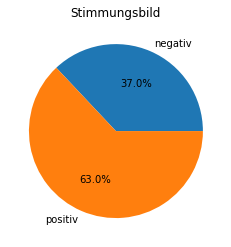

In [95]:
vf.plot_pie([negative_vocabulary_count, positive_vocabulary_count], labels=labels, title='Stimmungsbild')

#### 3.1.4 Features

Unser überwachter Klassifikator ist bekanntermaßen auf Features und Labels angewiesen. Während wir zweitere im vorherigen Abschnitt erzeugt haben, kümmern wir uns nun um die Features eines Tweets. In diesem Fall besteht ein einzelnes Feature wiederum aus einem Schlüsselwertpaar der Form `{ Wort: Präsenz }`, das angibt, ob ein Wort in einem Tweet vorhanden ist. Da unser überwachter Klassifikator alle Features gleich behandelt, ist dies für einen Tweet generell gegeben. Damit repräsentiert ein Tweet in unserem Fall genau so viele Features, wie er Wörter besitzt. 

Solche Single-Word-Features werden also als Schlüsselwertpaare über die `featurize()` Funktion wie folgt zusammengestellt:

In [96]:
def featurize(tweet):
    """Single word feature as key/value pair"""
    
    return dict([(word, True) for word in tweet])

Das Zusammenfassen mehrere Features übernimmt die `feature_set()` Funktion. An dieser Stelle werden alle Single-Word-Features eines Tweets gesammelt und das Label (hier: Stimmung) für diesen Tweet als Tupel der Form `( Features, Label )` angehangen.

In [97]:
def feature_set(tweets, label):
    """Feature set as feature/label tuples"""
    
    features = tweets.loc[tweets['Label'] == label]['Token'].apply(featurize)
    
    return [(tweet_dict, label) for tweet_dict in features]

Die Menge aller Feature-Sets repräsentiert somit die Menge aller Tweets und damit unsere Trainingsdaten für den überwachten Klassifikator.

In [98]:
train_set = feature_set(tweets, 'negativ') + feature_set(tweets, 'positiv')
train_set[0]

({'assad': True,
  'putin': True,
  'wollen': True,
  'erdoan': True,
  'lektion': True,
  'erteilen': True,
  'den': True,
  'konflikt': True,
  'um': True,
  'syrische': True,
  'provinz': True,
  'idlib': True,
  'notfalls': True,
  'militärisch': True,
  'beenden': True,
  'europa': True,
  'muss': True,
  'jetzt': True,
  'mehr': True,
  'tun': True,
  'als': True,
  'nur': True,
  'zuschauen': True,
  'harte': True,
  'sanktionen': True,
  'gegen': True,
  'moskau': True,
  'nötig': True},
 'negativ')

### 3.2 Textdaten klassifizieren

Wie bereits behandelt wollen wir unsere Textdaten anhand zweier unterschiedlicher Modelle klassifizieren. Die folgende Abbildung verdeutlicht den Unterschied zwischen überwachten und unüberwachten Lernen:

![Image](https://datasolut.com/wp-content/uploads/2020/08/Supervised-vs-unsupervised-learning.png)

Während das überwachte Lernen auf unterschiedlichen Klassen (hier: Kreis und Kreuz) basiert, benötigt unüberwachtes Lernen keine explizite Einteilung in Klassen mithilfe von Labels. Der Vorteil liegt auf der Hand: von den vielen Schritten im vergangenen Abschnitt wäre lediglich die Vektorisierung für eine unüberwachte Klassifikation notwendig gewesen.

#### 3.2.1 Überwachte Klassifikation

Mithilfe des [Naive Bayes](https://www.nltk.org/_modules/nltk/classify/naivebayes.html) Algorithmus führen wir als erstes eine überwachte Klassifikation aus. Dabei versucht der Klassifikator eine Menge an Features ihrer wahrscheinlichsten Klasse (hier: Stimmung) zuzuordnen. Wie im vorherigen Abschnitt behandelt wurde, repräsentiert jedes Wort eines Tweets ein Feature, während der Menge aller Features (Feature-Set) die zugehörige Klasse eines Tweets angehangen ist. In der folgenden Animation wird der Lernprozess des Klassifikators auf Basis von drei Klassen und zwei Features veranschaulicht:

![Naive Bayes](https://upload.wikimedia.org/wikipedia/commons/b/b4/Naive_Bayes_Classifier.gif)

Im Folgenden wird der `nbclassifier` als überwachter Klassifikator mithilfe von NLTK erzeugt und trainiert.

In [99]:
from nltk import NaiveBayesClassifier, classify

In [100]:
nbclassifier = NaiveBayesClassifier.train(train_set)

Nun stellt sich die Frage, welches Feature wohl am informativsten für den Klassifikator war?

**Aufgabe: Welches Wort aus den Trainingsdaten war für den überwachten Klassifikator am aussagekräftigsten?**

In [101]:
#hideInput
lm.show_task(321)

Output()

Output()

Output()

In [102]:
#solution
nbclassifier.show_most_informative_features()

Most Informative Features
                  gefahr = True           negati : positi =    179.3 : 1.0
                 falsche = True           negati : positi =    156.0 : 1.0
              schlechter = True           negati : positi =    124.2 : 1.0
               krankheit = True           negati : positi =    114.0 : 1.0
                 unnötig = True           negati : positi =    104.9 : 1.0
                gefahren = True           negati : positi =     99.0 : 1.0
              gefährlich = True           negati : positi =     85.8 : 1.0
                bestraft = True           negati : positi =     75.4 : 1.0
                schlecht = True           negati : positi =     72.7 : 1.0
                  risiko = True           negati : positi =     68.4 : 1.0


Jetzt wollen wir noch wissen, wie gut sich unser Klassifikator schlägt.

**Aufgabe: Wie hoch ist die Genauigkeit des überwachten Klassifikators auf den Trainingsdaten?**

In [103]:
#hideInput
lm.show_task(322)

Output()

Output()

Output()

In [104]:
#solution
classify.accuracy(nbclassifier, train_set)

0.8210628039621433

#### 3.2.2 Unüberwachte Klassifikation

Mithilfe von [K-means](https://www.nltk.org/_modules/nltk/cluster/kmeans.html) Clustering führen wir als zweites eine unüberwachte Klassifikation aus. Dabei versucht der Klassifikator ähnliche Vektoren zu einem Cluster (hier: Stimmung) zu gruppieren. Wie bereits behandelt, wurde jedes Wort eines Tweets auf einen Stimmungswert abgebildet, wonach alle _n_ Wörter eines Tweets einen _n_-dimensionalen Spaltenvektor bilden. In der folgenden Animation wird der Lernprozess des Klassifikators auf Basis von drei Clustern und zwei Dimensionen veranschaulicht:

![K-means](https://camo.githubusercontent.com/77a842161f9588166625169d1f0944e838837f19b105d7e55d235652cfcc3786/68747470733a2f2f692e696d6775722e636f6d2f6b3458636170492e676966)

Natürlich sind nicht immer gleich viele Wörter pro Tweet vorhanden. Daher müssen wir uns auf eine Dimensionalität einigen, die vom Klassifikator berücksichtigt wird. Naheliegend entscheiden wir uns für die im Mittel gefundenen Wörter und verdoppeln diese Anzahl als `dimensionality` wie folgt:

In [105]:
dimensionality = 2 * int(np.mean([len(vector) for vector in tweets['Vector']]))
dimensionality

4

Nun füllen wir entweder fehlende Werte auf, oder schneiden zu viele Werte ab, was über die `pad()` Funktion erreicht wird.

In [106]:
def pad(tweet):
    """Pad vectors with zeros at the end or strip vectors based on dimensionality"""
    
    tweet += [0.0] * (dimensionality - len(tweet))
    
    return tweet[:dimensionality]

In [107]:
tweets['Vector'] = tweets['Vector'].apply(pad)

Im Folgenden wird der `kmclusterer` als unüberwachter Klassifikator mithilfe von NLTK erzeugt...

In [108]:
from nltk.cluster import KMeansClusterer, euclidean_distance

In [109]:
kmclusterer = KMeansClusterer(2, euclidean_distance, repeats=4, avoid_empty_clusters=True)

...und trainiert.

In [110]:
_ = kmclusterer.cluster(tweets['Vector'].apply(np.array), True)

Während beim überwachten Klassifikator die Features untersucht werden konnten, lassen sich hier lediglich die erzeugten Cluster des Klassifikators betrachten.

**Aufgabe: Hinter welcher Funktion verstecken sich die Cluster unseres `kmclusterer` Klassifikators?**

In [111]:
#hideInput
lm.show_task(323)

Output()

Output()

Output()

In [112]:
#solution
centroids = kmclusterer.means()

Zum Abschluss schauen wir wo die Cluster liegen und ob sich ihre Lage mit dem Wertebereich der jeweiligen Stimmungswerte deckt?

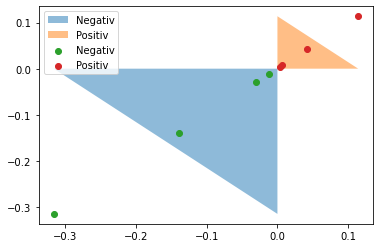

In [113]:
vf.plot_clusters(centroids)

<div style="background-color: #150458; padding: 5px;"></div>

## 4. Verwendung

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

In diesem Kapitel werden zum Abschluss eigene Tweets vorhergesagt, sowie bestehende Tweets für eine exemplarische Untersuchung der Vorhersagegenauigkeit verwendet.

Je nach Klassifikator sind dafür verschiedene Schritte nötig, die bereits aus den vorherigen Kapiteln bekannt sind und die in der folgenden Abbildung verdeutlicht werden:

![Usage](./img/usage_flow.png)

### 4.1 Textdaten vorhersagen

Exemplarisch wird ein frei erfundener negativer Tweet betrachtet:

> Was für EiN schlechtes Lernmodul

In [114]:
negative_tweet = "Was für EiN schlechtes Lernmodul"

Ebenfalls wird ein positives Beispiel betrachtet:

> Was für EiN gutes Lernmodul

In [115]:
positive_tweet = "Was für EiN gutes Lernmodul"

Optional kann ein eigener Tweet hier eingegeben werden:

In [116]:
user_tweet = input()

 Dieses Lernmodul ist klasse!


Im produktiven Einsatz müssten all diese Beispiele in der Datendomäne aufbereitet werden, was wir uns in diesem Fall aber ersparen und lieber auf bereits aufbereitete Tweets zurückgreifen.

In [117]:
tweets = tweets.merge(tweets_copy.to_frame(name='Text'), left_index=True, right_index=True)

Nun wählen wir 100 zufällige Exemplare wie folgt aus:

In [118]:
sample_tweets = tweets.sample(100)

Einzelne zufällige Tweets finden sich folgendermaßen:

In [119]:
tweets['Text'].sample(1).values[0]

'@RosasyFusiles Wäre so schön, aber muss morgen früh um 5 aufstehen 😭 glaub das packe ich dann nicht'

#### 4.1.1 Überwachter Klassifikator

Um den überwachten Klassifikator für eine Vorhersage zu nutzen, wird die folgende Funktion zur Hilfe genommen:

In [120]:
def classify_supervised(tweet, classifier):
    print('Tweet:', tweet, '\nStimmung:', classifier.classify(featurize(str.split(str.lower(tweet)))))

Welche Stimmung drückt unser negatives Beispiel nach Vorhersage der überwachten Klassifikation aus?

In [121]:
classify_supervised(negative_tweet, nbclassifier)

Tweet: Was für EiN schlechtes Lernmodul 
Stimmung: negativ


Welche Stimmung drückt unser positives Beispiel nach Vorhersage der überwachten Klassifikation aus?

In [122]:
classify_supervised(positive_tweet, nbclassifier)

Tweet: Was für EiN gutes Lernmodul 
Stimmung: positiv


Welche Stimmung drückt unser selbst gewähltes Beispiel nach Vorhersage der überwachten Klassifikation aus?

In [123]:
classify_supervised(user_tweet, nbclassifier)

Tweet: Dieses Lernmodul ist klasse! 
Stimmung: positiv


Wie schlägt sich unser überwachter Klassifikator im Detail? Dafür klassifizieren wir beispielhaft 100 Tweets über die `classify_supervised_multiple()` Funktion. Falsche Vorhersagen lassen sich über die Spalte _Prognose_ identifizieren.

In [124]:
mf.classify_supervised_multiple(sample_tweets, nbclassifier, labels) # On Train

#	Soll	Ist	Prognose Tweet
9285	positiv	positiv	True	 Moin ihr lieben tweeties...Ich wünsche euch einen schönen Sonntag. Erholt euch gut und macht es euch
138036	positiv	positiv	True	 &gt; als #ContainmentScouts in #Gütersloh antraten, haben es am Telefon auch mit Leuten zu tun, die 
32293	positiv	positiv	True	 @not_ur_muse Vielleicht in Sing Sing ? Oder  Alcatraz ? Oder Moabit ? Oder, er sitzt bei einer ander
12576	negativ	negativ	True	 Dekadenter Abend ... 1/4Bouchée á la reine - Blätterteigpastete+Shrimps &amp; Putenfilet+Dillrahmsau
7316	positiv	positiv	True	 Süße Mama im Familienhotel auf dem Tisch gefickt und #vollgespritztHD/4K video: 👉 https://t.co/eyw4p
115148	positiv	negativ	False	 Basierend auf den Informationen der einzelnen LK ergeben sich momentan 33.020 (+256 Neuinfektionen o
140964	positiv	negativ	False	 @TobiYume @Clowz123 @Elfen_Dude @werwolffromhell @cryarionic Ist doch schön, wenn du Spaß daran hatt
85848	negativ	negativ	True	 Twitter auf.Lehrer sollten auf Teil ihre

#### 4.1.2 Unüberwachter Klassifikator

Um den unüberwachten Klassifikator für eine Vorhersage zu nutzen, wird die folgende Funktion zur Hilfe genommen:

In [125]:
def classify_unsupervised(tweet, classifier):
    print('Tweet:', tweet, '\nStimmung:', labels[kmclusterer.classify(pad(vectorize(str.split(str.lower(tweet)))))])

Welche Stimmung drückt unser negatives Beispiel nach Vorhersage der unüberwachten Klassifikation aus?

In [126]:
classify_unsupervised(negative_tweet, kmclusterer)

Tweet: Was für EiN schlechtes Lernmodul 
Stimmung: negativ


Welche Stimmung drückt unser positives Beispiel nach Vorhersage der unüberwachten Klassifizierung aus?

In [127]:
classify_unsupervised(positive_tweet, kmclusterer)

Tweet: Was für EiN gutes Lernmodul 
Stimmung: positiv


Welche Stimmung drückt unser selbst gewähltes Beispiel nach Vorhersage der unüberwachten Klassifikation aus?

In [128]:
classify_unsupervised(user_tweet, kmclusterer)

Tweet: Dieses Lernmodul ist klasse! 
Stimmung: positiv


Wie schlägt sich unser unüberwachter Klassifikator im Detail? Dafür klassifizieren 100 zufällig ausgewählte Tweets über die `classify_unsupervised_multiple()` Funktion. Falsche Vorhersagen lassen sich über die Spalte _Prognose_ identifizieren.

In [129]:
mf.classify_unsupervised_multiple(sample_tweets, kmclusterer, labels)

#	Soll	Ist	Prognose Tweet
9285	positiv	positiv	True	 Moin ihr lieben tweeties...Ich wünsche euch einen schönen Sonntag. Erholt euch gut und macht es euch
138036	positiv	positiv	True	 &gt; als #ContainmentScouts in #Gütersloh antraten, haben es am Telefon auch mit Leuten zu tun, die 
32293	positiv	positiv	True	 @not_ur_muse Vielleicht in Sing Sing ? Oder  Alcatraz ? Oder Moabit ? Oder, er sitzt bei einer ander
12576	negativ	negativ	True	 Dekadenter Abend ... 1/4Bouchée á la reine - Blätterteigpastete+Shrimps &amp; Putenfilet+Dillrahmsau
7316	positiv	positiv	True	 Süße Mama im Familienhotel auf dem Tisch gefickt und #vollgespritztHD/4K video: 👉 https://t.co/eyw4p
115148	positiv	positiv	True	 Basierend auf den Informationen der einzelnen LK ergeben sich momentan 33.020 (+256 Neuinfektionen o
140964	positiv	positiv	True	 @TobiYume @Clowz123 @Elfen_Dude @werwolffromhell @cryarionic Ist doch schön, wenn du Spaß daran hatt
85848	negativ	positiv	False	 Twitter auf.Lehrer sollten auf Teil ihrer

<div style="background-color: #150458; padding: 5px;"></div>

## 5. Abschluss

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

Zum Abschluss des Lernmoduls folgen einige Verständnisfragen, bevor deine Gesamtpunktzahl errechnet wird.

**Aufgabe: Welche Eingabe(n) benötigt der überwachte Klassifikator?**

In [130]:
#hideInput
lm.show_task(501)

Output()

Output()

Output()

**Aufgabe: Welche Eingabe(n) benötigt der unüberwachte Klassifikator?**

In [131]:
#hideInput
lm.show_task(502)

Output()

Output()

Output()

**Aufgabe: Das Vokabular wird in diesem Lernmodul dafür verwendet...**

In [132]:
#hideInput
lm.show_task(503)

Output()

Output()

Output()

**Aufgabe: Welche Faktoren haben einen direkten Einfluss auf die Trainingsdauer des unüberwachten Klassifikators?**

In [133]:
#hideInput
lm.show_task(504)

Output()

Output()

Output()

Du hast es geschafft. Glückwunsch!

![Applause](https://media.giphy.com/media/FnGdcQzqypBaE/giphy.gif)

**Ergebnis:**

Du hast folgende Punktzahl erreicht...

In [134]:
lm.get_score()

0.0

In [135]:
#submitButton

**Zusammenfassung:**

Das vergangene Lernmodul gab einen Einblick in die Texterkennung als Teilgebiet des _NLP_. Im Zuge einer Stimmungsanalyse von aktuellen Beiträgen auf Twitter, haben wir in der [Datendomäne](#2.-Daten) zunächst Rohdaten beschafft und erkundet. Irrelevante Inhalte wurden auf Basis von Sonderzeichen, Stoppwörtern und der Länge des resultierenden Beitrags, identifiziert und verworfen. Daraufhin wurden die Daten in der [Modelldomäne](#3.-Modell) entweder überwacht oder unüberwacht klassifiziert, wobei verschiedene Einbettungsschritte, wie das Vektorisieren oder das Annotieren der Textdaten vorausgingen. Letztendlich konnte in der [Verwendungsdomäne](#4.-Verwendung) sowohl der überwachte als auch der unüberwachte Klassifikator die Stimmung eines Tweets korerkt vorhersagen. Jene Vorhersage ließe sich mithilfe alternativer Modelle, wie sie bspw. im [Lernmodul zu Datamining mit Scikit Learn](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-scikit) behandelt werden, verbessern. Analog dazu können Schritte, wie der Tokenizer, oder das Embedding, unabhängig vom Modell optimiert werden. Weiterführendes Material dazu befindet sich im [Anhang](#6.-Anhang).

<div style="background-color: #150458; padding: 5px;"></div>

## 6. Anhang

[Zurück zur Übersicht](#Lernmodul-zur-Verarbeitung-und-Analyse-von-Textdaten)

**Glossar:**

* Embedding
    * Einbetten von Wörtern in Modell (hier: Klassifikator)
* Label
    * Klasse (hier: Stimmung)
* Look-up-table
    * Schlüsselwertpaar (hier: Vokabular)
* NLP (Natural Language Processing)
    * Verarbeitung menschlicher Sprache
* NLTK (Natural Language ToolKit)
    * Python-Bibliothek für die Verarbeitung menschlicher Sprache
* Token
    * Ein oder mehrere Wörter (hier: Monogramme)
* Tokenization
    * Zerteilung von Sätzen in ein oder mehrere Wörter (hier: Monogramme)

**Weiterführende Lernmodule:**

- [Lernmodul zu Datamining mit Scikit Learn](https://projectbase.medien.hs-duesseldorf.de/eild.nrw-module/lernmodul-scikit)

**Weiterführende Inhalte:**

* Leitfäden
    * [Cookbook by NLTK](https://www.nltk.org/book/)
    * [Recurrent neural networks by TensorFlow](https://www.tensorflow.org/guide/keras/rnn?hl=en)
    * [Text classification by Google Developers](https://developers.google.com/machine-learning/guides/text-classification)
* Embedding
    * [TextBlob](https://textblob.readthedocs.io/en/dev/)
    * [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)
* Tutorials
    * [Basic text classification by TensorFlow](https://www.tensorflow.org/tutorials/keras/text_classification?hl=en)

**Referenzen:**

<a id="1">[1]</a> Nane Kratzke. (2020). Monthly Samples of German Tweets (Version 2020-04) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.3783478

<a id="2">[2]</a> R. Remus, U. Quasthoff & G. Heyer: SentiWS - a Publicly Available German-language Resource for Sentiment Analysis. In: Proceedings of the 7th International Language Resources and Evaluation (LREC'10), pp. 1168-1171, 2010